## Observations and Insights 

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_mouse = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
merge_mouse.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [55]:
# Checking the number of mice. also shows that the data doesnot need cleaning up
count = merge_mouse.count()
count

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [56]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merge_mouse.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicates.head()



0    False
1    False
2    False
3    False
4    False
dtype: bool

In [57]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_mouse[merge_mouse.duplicated()]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [58]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merge_mouse.drop_duplicates(keep = "first")

In [59]:
# Checking the number of mice in the clean DataFrame.
count2 = clean_data.count()
count2

Mouse ID              1892
Drug Regimen          1892
Sex                   1892
Age_months            1892
Weight (g)            1892
Timepoint             1892
Tumor Volume (mm3)    1892
Metastatic Sites      1892
dtype: int64

In [60]:
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Create new dataframe for Tumor Volume Changes as per drug, and timepoint
tumor_volume = clean_data.filter(['Drug Regimen','Timepoint','Tumor Volume (mm3)'], axis=1)
tumor_volume = tumor_volume.set_index('Drug Regimen')
tumor_volume_drug = tumor_volume.groupby(['Drug Regimen','Timepoint']) 
tumor_volume_drug.head()

### Calculate mean for each drug type
mean_tum_vol = pd.DataFrame(tumor_volume.groupby(['Drug Regimen','Timepoint']).mean())
mean_tum_vol = mean_tum_vol.rename(columns = {"Tumor Volume (mm3)": "Mean of Tumor Volume (mm3)"})
#mean_tum_vol.head(100)

###Calculate the median for each drug type
median_tum_vol = pd.DataFrame(tumor_volume.groupby(['Drug Regimen','Timepoint']).median())
median_tum_vol = median_tum_vol.rename(columns = {"Tumor Volume (mm3)": "Median of Tumor Volume (mm3)"})
#median_tum_vol.head(100)

###Calculate the variance for each drug type
var_tum_vol = pd.DataFrame(tumor_volume.groupby(['Drug Regimen','Timepoint']).var())
var_tum_vol = var_tum_vol.rename(columns = {"Tumor Volume (mm3)": "Varaince of Tumor Volume (mm3)"})
#var_tum_vol.head(100)

###Calculate the standard deviation for each drug type
stdvar_tum_vol = pd.DataFrame(tumor_volume.groupby(['Drug Regimen','Timepoint']).std())
stdvar_tum_vol = stdvar_tum_vol.rename(columns = {"Tumor Volume (mm3)": "Standard Deviation of Tumor Volume (mm3)"})
#stdvar_tum_vol.head(100)

###Calculate the SEM for each drug type
sem_tum_vol = pd.DataFrame(tumor_volume.groupby(['Drug Regimen','Timepoint']).sem())
sem_tum_vol = sem_tum_vol.rename(columns = {"Tumor Volume (mm3)": "SEM of Tumor Volume (mm3)"})
#sem_tum_vol.head(100)


In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = pd.concat([mean_tum_vol,median_tum_vol,var_tum_vol,stdvar_tum_vol,sem_tum_vol],axis=1)
summary_stats.head(100)


Mean of Tumor Volume (mm3)  \
Drug Regimen Timepoint                               
Capomulin    0                           45.000000   
             5                           44.266086   
             10                          43.084291   
             15                          42.064317   
             20                          40.716325   
...                                            ...   
Zoniferol    25                          55.432935   
             30                          57.713531   
             35                          60.089372   
             40                          62.916692   
             45                          65.960888   

                        Median of Tumor Volume (mm3)  \
Drug Regimen Timepoint                                 
Capomulin    0                             45.000000   
             5                             45.597064   
             10                            43.421014   
             15                            42.798160   
             20                            40.716428   
...                                              ...   
Zoniferol    25                            55.676604   
             30                            57.419744   
             35                            60.365832   
             40                            62.274543   
             45                            65.684689   

                        Varaince of Tumor Volume (mm3)  \
Drug Regimen Timepoint                                   
Capomulin    0                                0.000000   
             5                                5.030889   
             10                              12.344133   
             15                              16.878693   
             20                              19.035028   
...                                                ...   
Zoniferol    25                               5.808348   
             30                               9.601024   
             35                              10.876760   
             40                              13.958456   
             45                              14.100301   

                        Standard Deviation of Tumor Volume (mm3)  \
Drug Regimen Timepoint                                             
Capomulin    0                                          0.000000   
             5                                          2.242964   
             10                                         3.513422   
             15                                         4.108369   
             20                                         4.362915   
...                                                          ...   
Zoniferol    25                                         2.410052   
             30                                         3.098552   
             35                                         3.297993   
             40                                         3.736102   
             45                                         3.755037   

                        SEM of Tumor Volume (mm3)  
Drug Regimen Timepoint                             
Capomulin    0                           0.000000  
             5                           0.448593  
             10                          0.702684  
             15                          0.838617  
             20                          0.909731  
...                                           ...  
Zoniferol    25                          0.602513  
             30                          0.800043  
             35                          0.881426  
             40                          0.998515  
             45                          1.003576  

[100 rows x 5 columns]

## Bar and Pie Charts

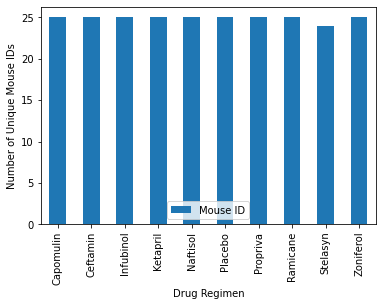

In [84]:
# Generate a bar plot showing the total number of unique mice id's for each treatment.
mouse_count_drug = clean_data.filter(['Drug Regimen','Mouse ID'], axis=1)
mouse_count_drug1 = mouse_count_drug.set_index('Drug Regimen')
mouse_count_drug = mouse_count_drug1.groupby(['Drug Regimen']).nunique()
#mouse_count_drug.head(100)

#create bar chart
count_plot = mouse_count_drug.plot.bar()
count_plot.set_xlabel("Drug Regimen")
count_plot.set_ylabel("Number of Unique Mouse IDs")

#Save Figure
plt.savefig("figures/BarChart_UniqueValues.png")
plt.show()



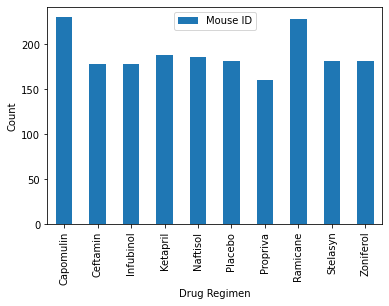

In [85]:
#Generate a bar plot showing the total count for each drug regimen throughout the course of the study
mouse_count_drug2 = mouse_count_drug1.groupby(['Drug Regimen']).count()
mouse_count_drug2.head(100)

#create bar chart
count_plot2 = mouse_count_drug2.plot.bar()
count_plot2.set_xlabel("Drug Regimen")
count_plot2.set_ylabel("Count")

#Save Figure
plt.savefig("figures/BarChart_MouseCount.png")
plt.show()

In [93]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#Use the same groupby dataframe as before
# Set X-axis and Tick locations

x_axis = np.arange(len(mouse_count_drug))
plt.bar(x_axis, mouse_count_drug["Drug Regimen"], color="b", alpha=0.5, align="center")

# Set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(drug_group_count["Drug Regimen"])*1.05)

# Set a Title and labels
plt.title("Count of data points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")

# Save the figure
plt.savefig("figures/PyplotBarChart.png")
plt.show()


KeyError: 'Drug Regimen'

In [95]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender = clean_data.groupby("Sex")
groupby_gender_count = pd.DataFrame(groupby_gender["Sex"].count())
groupby_gender_count.head(100)


,Sex
Sex,
Female,934
Male,958


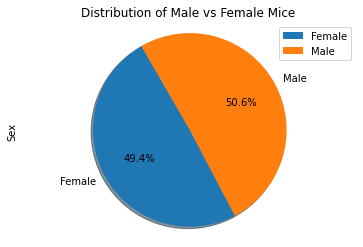

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pie = groupby_gender_count.plot(kind="pie", y="Sex",
                                  title = ("Distribution of Male vs Female Mice"),
                                  autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.savefig("figures/PandaPieChart.png")
plt.show()



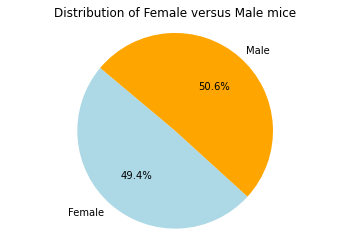

In [142]:
genders = list(groupby_gender_count.index.values)
gender_counts = groupby_gender_count["Sex"]
colors = ["lightblue", "orange"]

plt.pie(gender_counts, labels=genders, colors=colors, autopct="%1.1f%%", startangle=140)

plt.title("Distribution of Female versus Male mice")
plt.axis("equal")
plt.savefig("figures/PyplotPieChart.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [138]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Create new DF for the four drugs
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#use asin function to extract these four drugs
four_drugs = clean_data[clean_data['Drug Regimen'].isin(drug_list)]
#four_drugs.head()

#Group the data by Drug and Mouse ID
last_tumor = four_drugs.filter(['Drug Regimen','Mouse ID','Tumor Volume (mm3)'], axis=1)
last_tumor = last_tumor.set_index('Drug Regimen')
last_tumor_drug = last_tumor.groupby(['Drug Regimen',"Mouse ID"]) 
last_tumor_drug.head(100)

# Start by getting the last (greatest) timepoint for each mouse
last_tumor_size = pd.DataFrame(last_tumor.groupby(['Drug Regimen', "Mouse ID"]) .max())
last_tumor_size.head(100)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               45.651331
             b742               45.000000
             f966               45.000000
             g288               46.304003
             g316               46.809225
...                                   ...
Ramicane     s508               45.000000
             u196               47.622816
             w678               45.000000
             y449               46.378092
             z578               45.000000

[100 rows x 1 columns]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
